In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/content/factbook-_1_ (2).xls'
data = pd.read_excel(file_path)

In [83]:
# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(data.head())

        Country        Area   Birth rate   Current account balance   \
0         Japan     377,835         9.47       $170,200,000,000.00    
1       Germany     357,021         8.33        $73,590,000,000.00    
2  Saudi Arabia   1,960,582        29.56        $51,500,000,000.00    
3        Russia  17,075,200         9.80        $46,040,000,000.00    
4   Switzerland      41,290         9.77        $40,950,000,000.00    

    Death rate  Electricity consumption   Electricity production   \
0         8.95          971,000,000,000     1,044,000,000,000.00    
1        10.55          519,500,000,000       560,000,000,000.00    
2         2.62          128,500,000,000       138,200,000,000.00    
3        14.52          894,300,000,000       915,000,000,000.00    
4         8.48           54,530,000,000        63,470,000,000.00    

                Exports                      GDP    GDP per capita   ...  \
0   $538,800,000,000.00    $3,745,000,000,000.00        $29,400.00   ...   
1   $8

In [84]:
# Display descriptive statistics
print(data.describe())

        Birth rate   Death rate   GDP real growth rate  \
count   149.000000   149.000000             149.000000   
mean     21.889799     9.861812               5.300671   
std      11.003152     5.091107               5.705421   
min       7.230000     2.420000              -8.200000   
25%      12.030000     6.260000               3.000000   
50%      18.780000     8.680000               4.800000   
75%      29.740000    11.810000               6.100000   
max      47.390000    29.360000              52.300000   

        Infant mortality rate   Inflation rate    Life expectancy at birth  \
count              149.000000        149.000000                 149.000000   
mean                36.458658          6.987248                  66.931611   
std                 33.241462         12.539372                  12.324980   
min                  2.290000         -0.300000                  33.870000   
25%                  8.570000          2.300000                  61.390000   
50%      

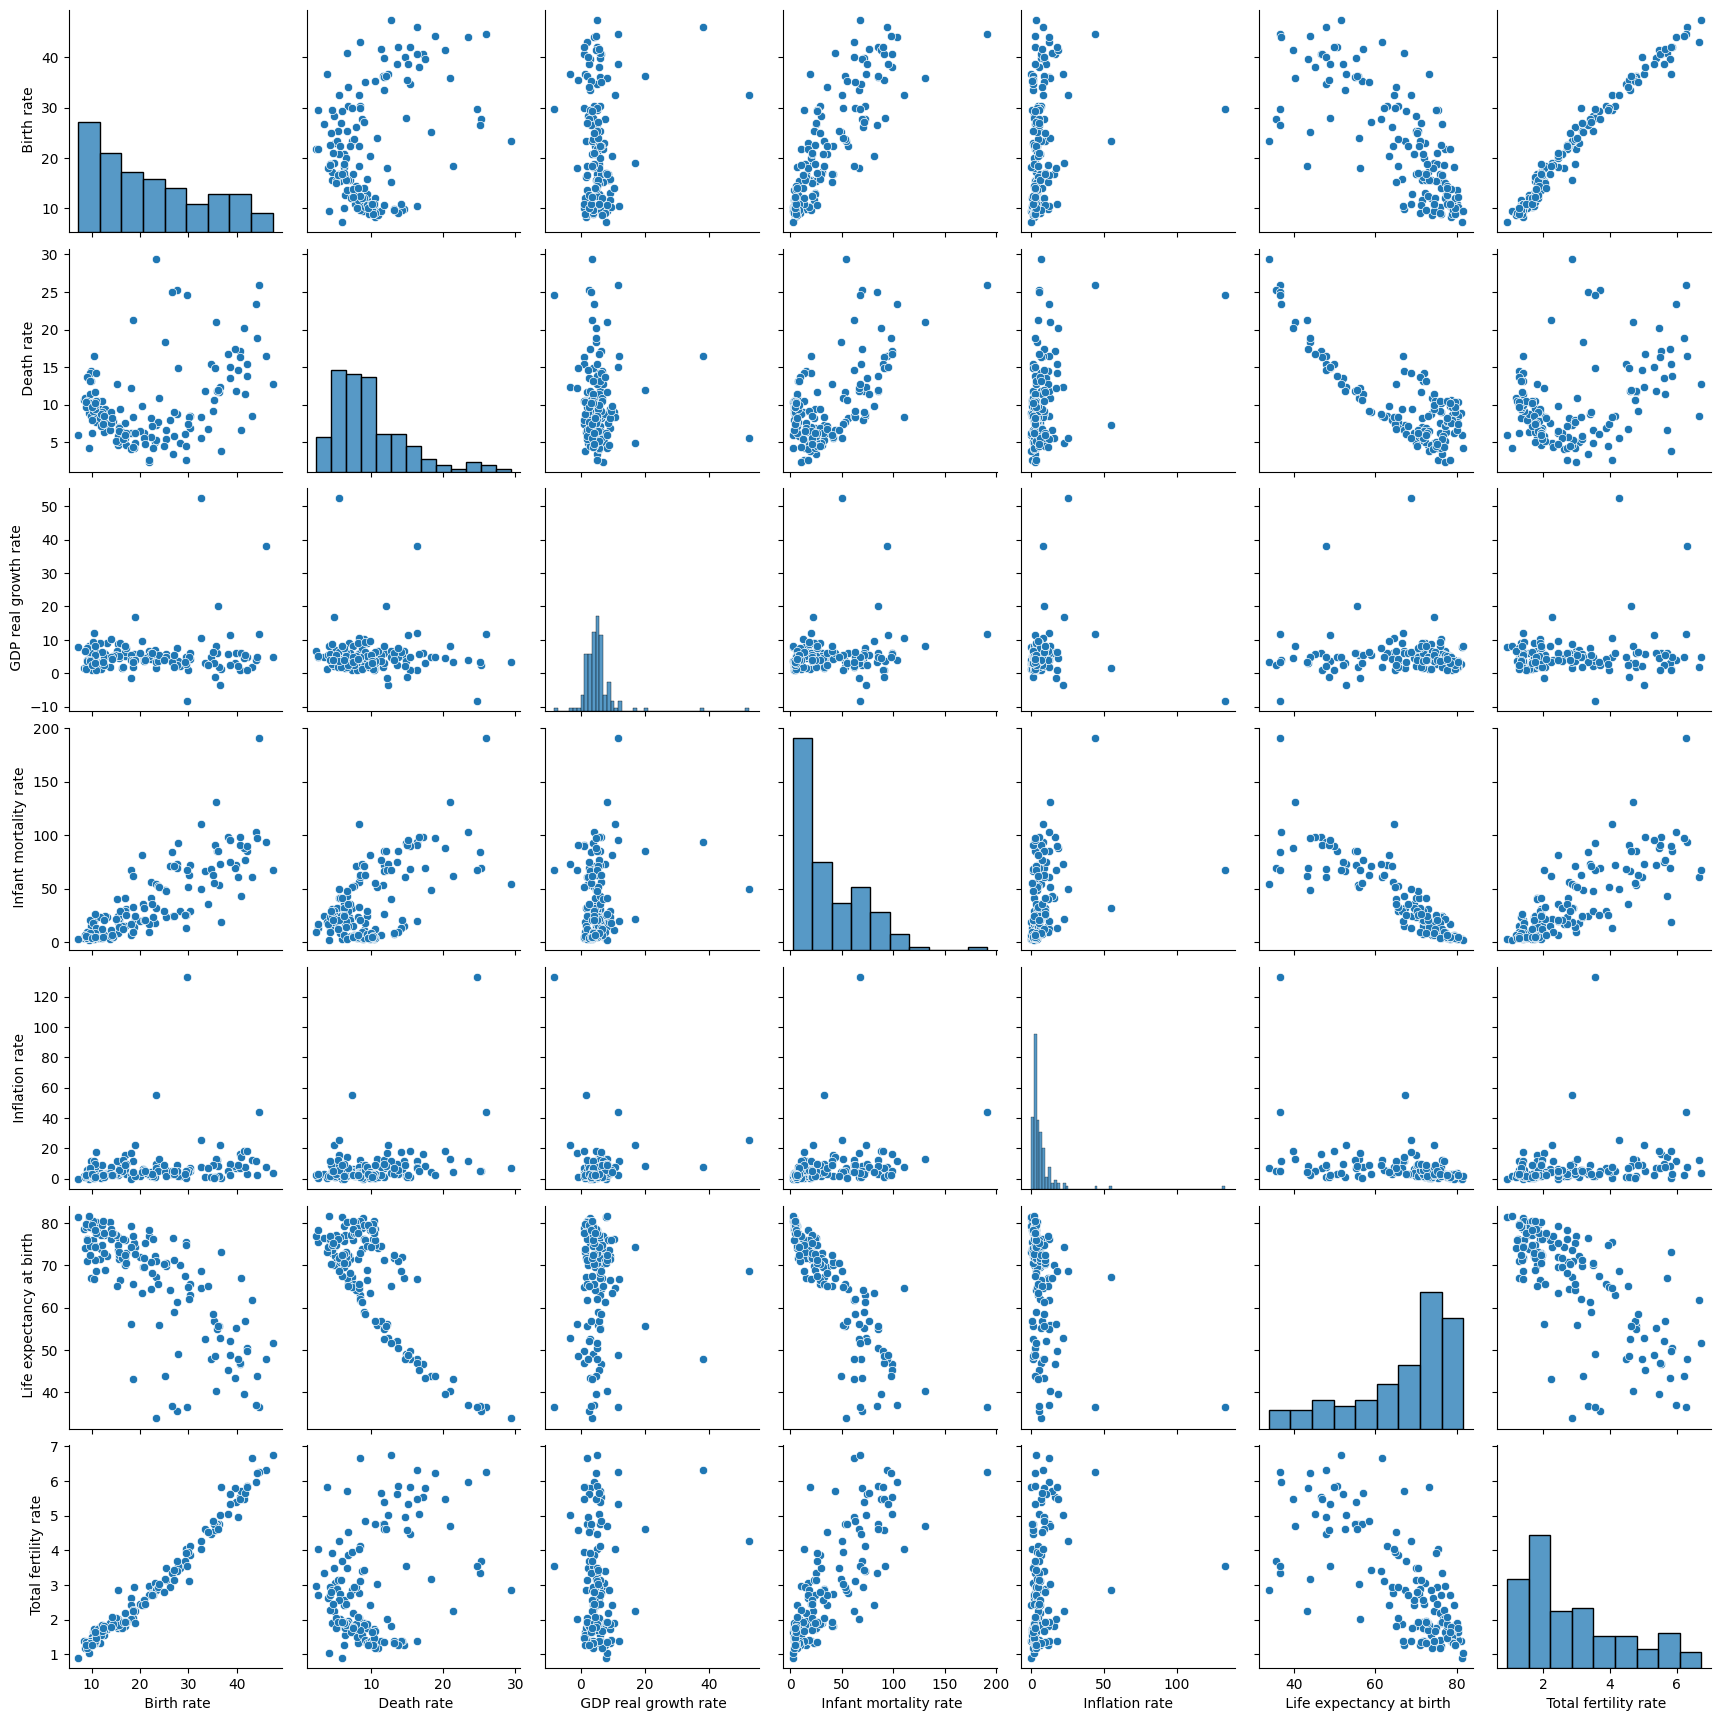

In [85]:
# Pairplot for visualization
sns.pairplot(data)
plt.show()

In [86]:
# Menghapus spasi di awal dan akhir nama kolom
data.columns = data.columns.str.strip()
print("Nama kolom dalam dataset:")
print(data.columns)

Nama kolom dalam dataset:
Index(['Country', 'Area', 'Birth rate', 'Current account balance',
       'Death rate', 'Electricity consumption', 'Electricity production',
       'Exports', 'GDP', 'GDP per capita', 'GDP real growth rate', 'Highways',
       'Imports', 'Industrial production growth rate', 'Infant mortality rate',
       'Inflation rate', 'Internet users', 'Investment', 'Labor force',
       'Life expectancy at birth', 'Military expenditures',
       'Natural gas consumption', 'Oil consumption', 'Population',
       'Public debt', 'Railways', 'Reserves of foreign exchange & gold',
       'Total fertility rate', 'Unemployment rate'],
      dtype='object')


In [88]:
# Bersihkan kolom numerik dari karakter non-numerik dan konversi ke tipe numerik
numeric_columns = ['GDP', 'Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [89]:
# Cek jumlah nilai NaN di setiap kolom
print("Jumlah nilai NaN di setiap kolom sebelum dropna():")
print(data.isna().sum())

Jumlah nilai NaN di setiap kolom sebelum dropna():
Country                                 0
Area                                    0
Birth rate                              0
Current account balance                 0
Death rate                              0
Electricity consumption                 0
Electricity production                  0
Exports                                 0
GDP                                     0
GDP per capita                          0
GDP real growth rate                    0
Highways                                0
Imports                                 0
Industrial production growth rate      15
Infant mortality rate                   0
Inflation rate                          0
Internet users                          0
Investment                              5
Labor force                             0
Life expectancy at birth                0
Military expenditures                   0
Natural gas consumption                 0
Oil consumption          

In [90]:
# Hapus baris dengan nilai yang hilang
data = data.dropna()

In [91]:
# Cek lagi jumlah nilai NaN di setiap kolom setelah dropna()
print("Jumlah nilai NaN di setiap kolom setelah dropna():")
print(data.isna().sum())

Jumlah nilai NaN di setiap kolom setelah dropna():
Country                                0
Area                                   0
Birth rate                             0
Current account balance                0
Death rate                             0
Electricity consumption                0
Electricity production                 0
Exports                                0
GDP                                    0
GDP per capita                         0
GDP real growth rate                   0
Highways                               0
Imports                                0
Industrial production growth rate      0
Infant mortality rate                  0
Inflation rate                         0
Internet users                         0
Investment                             0
Labor force                            0
Life expectancy at birth               0
Military expenditures                  0
Natural gas consumption                0
Oil consumption                        0
Popula

In [92]:
# Pastikan ada data yang tersisa setelah pembersihan
print("Jumlah baris dan kolom setelah pembersihan:", data.shape)

Jumlah baris dan kolom setelah pembersihan: (116, 29)


In [93]:
# Variabel dependen dan independen
Y = data['GDP']
X = data[['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']]

In [94]:
# Memastikan kolom X tidak kosong
print("Kolom dalam X setelah pembersihan:")
print(X.columns)

Kolom dalam X setelah pembersihan:
Index(['Exports', 'Imports', 'Industrial production growth rate', 'Investment',
       'Unemployment rate'],
      dtype='object')


In [95]:
# Stepwise selection function
def stepwise_selection(X, Y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        if len(excluded) == 0:
            break
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # Backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out and len(pvalues) > 1:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')
        if not changed:
            break
    return included

In [96]:
# Menjalankan regresi bertahap
result = stepwise_selection(X, Y)

Add  Imports                        with p-value 8.01484e-41
Add  Exports                        with p-value 0.00111175


In [97]:
# Menampilkan hasil
print('Final features:')
print(result)

Final features:
['Imports', 'Exports']


In [98]:
# Membuat model final
final_model = sm.OLS(Y, sm.add_constant(X[result])).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     243.8
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.01e-41
Time:                        06:10:48   Log-Likelihood:                -3309.4
No. Observations:                 116   AIC:                             6625.
Df Residuals:                     113   BIC:                             6633.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.706e+09   6.28e+10      0.123      0.9